# Integer Sequence Learning
Predict next integer in sequence

https://www.kaggle.com/c/integer-sequence-learning/data

In [30]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Attempt#1 RNN(GRU)
consider sequences as text

In [31]:
from fastai.text import *

In [32]:
path = Config.data_path()/'integer-sequence'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/storage/integer-sequence')

In [4]:
#! kaggle competitions download -c integer-sequence-learning -p {path} 

  0%|                                                | 0.00/263k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 263k/263k [00:00<00:00, 34.9MB/s]
 61%|███████████████████████▎              | 5.00M/8.14M [00:00<00:00, 27.3MB/s]
100%|██████████████████████████████████████| 8.14M/8.14M [00:00<00:00, 36.5MB/s]
 58%|█████████████████████▊                | 5.00M/8.69M [00:00<00:00, 44.4MB/s]
100%|██████████████████████████████████████| 8.69M/8.69M [00:00<00:00, 49.1MB/s]


In [29]:
#! for z in *.zip; do unzip $z; rm $z; done

In [5]:
! ls {path}

sample_submission.csv  test.csv  train.csv


In [33]:
train_csv_pd = pd.read_csv(path/'train.csv'); train_csv_pd.head()

,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [34]:
test_csv_pd = pd.read_csv(path/'test.csv'); test_csv_pd.head()

,Id,Sequence
0,1,"1,0,0,2,24,552,21280,103760,70299264,579285324..."
1,2,"1,1,5,11,35,93,269,747,2115,5933,16717,47003,1..."
2,4,"0,1,101,2,15,102,73,3,40,16,47,103,51,74,116,4..."
3,5,"1,4,14,23,42,33,35,34,63,66,87,116,84,101,126,..."
4,6,"1,1,2,5,4,2,6,13,11,4,10,10,12,6,8,29,16,11,18..."


In [26]:
train_csv_small_pd = train_csv_pd[0:5]; train_csv_small_pd

,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [28]:
train_csv_small_pd['Seq'] = train_csv_small_pd['Sequence'].apply(lambda x: ' '.join(x.split(',')));train_csv_small_pd

/opt/conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Id,Sequence,Seq
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352...",1 3 13 87 1053 28576 2141733 508147108 4021352...
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,...",1 2 1 5 5 1 11 16 7 1 23 44 30 9 1 47 112 104 ...
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320...",1 2 4 5 8 10 16 20 32 40 64 80 128 160 256 320...
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099...",1 8 25 83 274 2275 132224 1060067 3312425 1099...
4,13,"1,111,12211,1343211,147753211,16252853211,1787...",1 111 12211 1343211 147753211 16252853211 1787...


In [36]:
train_text_small =  train_csv_small_pd['Seq'].str.cat(sep='. ');train_text_small

'1 3 13 87 1053 28576 2141733 508147108 402135275365 1073376057490373 9700385489355970183 298434346895322960005291 31479360095907908092817694945 11474377948948020660089085281068730. 1 2 1 5 5 1 11 16 7 1 23 44 30 9 1 47 112 104 48 11 1 95 272 320 200 70 13 1 191 640 912 720 340 96 15 1 383 1472 2464 2352 1400 532 126 17 1 767 3328 6400 7168 5152 2464 784 160 19 1 1535 7424. 1 2 4 5 8 10 16 20 32 40 64 80 128 160 256 320 512 640 1024 1280 2048 2560 4096 5120 8192 10240 16384 20480 32768 40960 65536 81920 131072 163840 262144 327680 524288 655360 1048576 1310720 2097152. 1 8 25 83 274 2275 132224 1060067 3312425 10997342 36304451 301432950 17519415551 140456757358 438889687625 1457125820233 4810267148324 39939263006825 2321287521544174 18610239435360217. 1 111 12211 1343211 147753211 16252853211 1787813853211 196659523853211 21632547623853211 2379580238623853211 261753826248623853211 28792920887348623853211'

In [96]:
data_small = TextDataBunch.from_df(path,train_csv_small,train_csv_small, min_freq=1, bs=1)

In [97]:
data_small.show_batch()

text,target
xxbos 1 2 1 5 5 1 11 16 7 1 23 44 30 9 1 47 112 104 48 11 1 95 272 320 200 70 13 1 191 640 912 720 340 96 15 1 383 1472 2464 2352 1400 532 126 17 1 767 3328 6400 7168 5152 2464 784 160 19 1 1535,7424


In [35]:
train_pd = pd.DataFrame();

In [36]:
train_pd['Seq'] = train_csv_pd['Sequence'].apply(lambda x: ' '.join(x.split(',')));train_pd.head()

,Seq
0,1 3 13 87 1053 28576 2141733 508147108 4021352...
1,1 2 1 5 5 1 11 16 7 1 23 44 30 9 1 47 112 104 ...
2,1 2 4 5 8 10 16 20 32 40 64 80 128 160 256 320...
3,1 8 25 83 274 2275 132224 1060067 3312425 1099...
4,1 111 12211 1343211 147753211 16252853211 1787...


In [37]:
val_b = int(train_pd.shape[0]*90/100);val_b

102460

In [38]:
train_data = train_pd[0:val_b]; train_data.head()

,Seq
0,1 3 13 87 1053 28576 2141733 508147108 4021352...
1,1 2 1 5 5 1 11 16 7 1 23 44 30 9 1 47 112 104 ...
2,1 2 4 5 8 10 16 20 32 40 64 80 128 160 256 320...
3,1 8 25 83 274 2275 132224 1060067 3312425 1099...
4,1 111 12211 1343211 147753211 16252853211 1787...


In [39]:
valid_data = train_pd[val_b+1:]; valid_data.shape

(11384, 1)

In [40]:
train_text =  train_data['Seq'].str.cat(sep='. ');train_text[:1000]

'1 3 13 87 1053 28576 2141733 508147108 402135275365 1073376057490373 9700385489355970183 298434346895322960005291 31479360095907908092817694945 11474377948948020660089085281068730. 1 2 1 5 5 1 11 16 7 1 23 44 30 9 1 47 112 104 48 11 1 95 272 320 200 70 13 1 191 640 912 720 340 96 15 1 383 1472 2464 2352 1400 532 126 17 1 767 3328 6400 7168 5152 2464 784 160 19 1 1535 7424. 1 2 4 5 8 10 16 20 32 40 64 80 128 160 256 320 512 640 1024 1280 2048 2560 4096 5120 8192 10240 16384 20480 32768 40960 65536 81920 131072 163840 262144 327680 524288 655360 1048576 1310720 2097152. 1 8 25 83 274 2275 132224 1060067 3312425 10997342 36304451 301432950 17519415551 140456757358 438889687625 1457125820233 4810267148324 39939263006825 2321287521544174 18610239435360217. 1 111 12211 1343211 147753211 16252853211 1787813853211 196659523853211 21632547623853211 2379580238623853211 261753826248623853211 28792920887348623853211. 1 1 1 1 1 1 1 1 1 5 1 1 1 1 5 5 1 1 1 1 11 5 5 11 5 1 1 1 1 5 23 5 23 5 5 1 1 1 

In [41]:
valid_text =  valid_data['Seq'].str.cat(sep='. ');

In [42]:
test_csv_pd['Seq'] = test_csv_pd['Sequence'].apply(lambda x: ' '.join(x.split(',')));test_csv_pd.head()

,Id,Sequence,Seq
0,1,"1,0,0,2,24,552,21280,103760,70299264,579285324...",1 0 0 2 24 552 21280 103760 70299264 579285324...
1,2,"1,1,5,11,35,93,269,747,2115,5933,16717,47003,1...",1 1 5 11 35 93 269 747 2115 5933 16717 47003 1...
2,4,"0,1,101,2,15,102,73,3,40,16,47,103,51,74,116,4...",0 1 101 2 15 102 73 3 40 16 47 103 51 74 116 4...
3,5,"1,4,14,23,42,33,35,34,63,66,87,116,84,101,126,...",1 4 14 23 42 33 35 34 63 66 87 116 84 101 126 ...
4,6,"1,1,2,5,4,2,6,13,11,4,10,10,12,6,8,29,16,11,18...",1 1 2 5 4 2 6 13 11 4 10 10 12 6 8 29 16 11 18...


In [43]:
data = TextLMDataBunch.from_df(path, 
                               train_data, 
                               valid_data,
                               text_cols=0,
                               min_freq=1, 
                               max_vocab=1147437794894802066008908528106873, 
                               bs=5)

In [88]:
data

TextLMDataBunch;

Train: LabelList (102460 items)
x: LMTextList
xxbos 1 3 13 87 1053 28576 2141733 508147108 402135275365 1073376057490373 9700385489355970183 298434346895322960005291 31479360095907908092817694945 11474377948948020660089085281068730,xxbos 1 2 1 5 5 1 11 16 7 1 23 44 30 9 1 47 112 104 48 11 1 95 272 320 200 70 13 1 191 640 912 720 340 96 15 1 383 1472 2464 2352 1400 532 126 17 1 767 3328 6400 7168 5152 2464 784 160 19 1 1535 7424,xxbos 1 2 4 5 8 10 16 20 32 40 64 80 128 160 256 320 512 640 1024 1280 2048 2560 4096 5120 8192 10240 16384 20480 32768 40960 65536 81920 131072 163840 262144 327680 524288 655360 1048576 1310720 2097152,xxbos 1 8 25 83 274 2275 132224 1060067 3312425 10997342 36304451 301432950 17519415551 140456757358 438889687625 1457125820233 4810267148324 39939263006825 2321287521544174 18610239435360217,xxbos 1 111 12211 1343211 147753211 16252853211 1787813853211 196659523853211 21632547623853211 2379580238623853211 261753826248623853211 2879292088734862

In [44]:
gc.collect()

0

# Train

In [45]:
learn = language_model_learner(data, AWD_LSTM, pretrained=False, drop_mult=0.3)

In [93]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


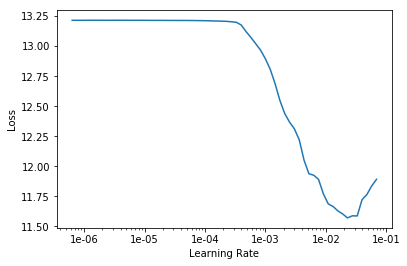

In [94]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.save('step1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(3, 1e-3, moms=(0.8,0.7))

In [ ]:
learn.save('step2')

In [46]:
learn.load('step2')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (102460 items)
x: LMTextList
xxbos 1 3 13 87 1053 28576 2141733 508147108 402135275365 1073376057490373 9700385489355970183 298434346895322960005291 31479360095907908092817694945 11474377948948020660089085281068730,xxbos 1 2 1 5 5 1 11 16 7 1 23 44 30 9 1 47 112 104 48 11 1 95 272 320 200 70 13 1 191 640 912 720 340 96 15 1 383 1472 2464 2352 1400 532 126 17 1 767 3328 6400 7168 5152 2464 784 160 19 1 1535 7424,xxbos 1 2 4 5 8 10 16 20 32 40 64 80 128 160 256 320 512 640 1024 1280 2048 2560 4096 5120 8192 10240 16384 20480 32768 40960 65536 81920 131072 163840 262144 327680 524288 655360 1048576 1310720 2097152,xxbos 1 8 25 83 274 2275 132224 1060067 3312425 10997342 36304451 301432950 17519415551 140456757358 438889687625 1457125820233 4810267148324 39939263006825 2321287521544174 18610239435360217,xxbos 1 111 12211 1343211 147753211 16252853211 1787813853211 196659523853211 21632547623853211 2379580238623853211 26175382624862385

In [27]:
preds=learn.predict('1 1 2 3 5 8');preds

'1 1 2 3 5 8 9'

## Submitting results to kaggle

In [75]:
import pandas as pd
submission = pd.DataFrame()

In [76]:
submission['Id'] = test_csv_pd['Id'].astype(int)

In [84]:
test_seq = test_csv_pd['Seq'][0]

In [87]:
def predict(seq):
    return learn.predict(seq).split(' ')[-1:][0]

In [88]:
predict(test_seq)

'32706116'

In [89]:
test_csv_pd['Last'] = test_csv_pd['Seq'].apply(lambda x: predict(x))

In [90]:
submission['Last'] = test_csv_pd['Last']

In [77]:
submission.shape

(113845, 1)

In [91]:
submission.to_csv(path/'submission.csv', index=False)

In [92]:
! kaggle competitions submit integer-sequence-learning -f {path/'submission.csv'} -m "My submission"

100%|██████████████████████████████████████| 1.36M/1.36M [00:00<00:00, 1.73MB/s]
Successfully submitted to Integer Sequence Learning

very poor result actually - 0.04634